In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [51]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
x = df.drop('Species', axis = 1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [53]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

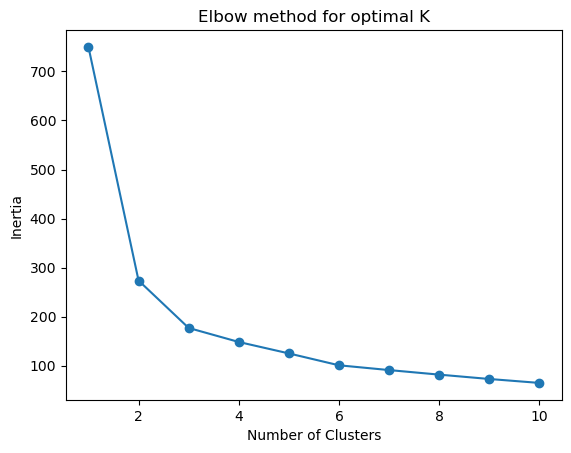

In [54]:
plt.plot(range(1,11),wcss, marker='o')
plt.title('Elbow method for optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [55]:
for k, value in enumerate(wcss, 1):
    print(f'Number of Clusters: {k}, WCSS: {value}')

Number of Clusters: 1, WCSS: 749.9999999999999
Number of Clusters: 2, WCSS: 273.7275610947794
Number of Clusters: 3, WCSS: 177.05608895062971
Number of Clusters: 4, WCSS: 148.4640515436302
Number of Clusters: 5, WCSS: 125.14388253043394
Number of Clusters: 6, WCSS: 100.93372195572692
Number of Clusters: 7, WCSS: 91.19922961947024
Number of Clusters: 8, WCSS: 81.90979987034464
Number of Clusters: 9, WCSS: 73.02596015667218
Number of Clusters: 10, WCSS: 64.99375348355511


In [59]:
cluster_count = 1
for i in range(len(wcss)-1):
    if (wcss[i] - wcss[i+1]>90):
        cluster_count += 1
print("The number of clusters using the elbow method for IRIS dataset is:", cluster_count)

The number of clusters using the elbow method for IRIS dataset is: 3
